In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import nltk
import pickle
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df  = pd.read_csv('/content/drive/My Drive/Amazon_Product_Sentiment_IE/Electronics_Cleaned.csv')
df.head()

,Unnamed: 0,reviewText,overall,y,cleaned_reviews
0,0,we got this gps for my husband who is an otr o...,5,2,got gp husband otr road trucker impress ship t...
1,1,im a professional otr truck driver and i bough...,1,0,im profession otr truck driver bought tnd truc...
2,2,well what can i say ive had this unit in my t...,3,1,well say ive unit truck four day prior garmin ...
3,3,not going to write a long review even thought ...,2,0,go write long review even thought unit deserv ...
4,4,ive had mine for a year and heres what we got ...,1,0,ive mine year here got tri rout non truck rout...


In [4]:
df.shape
df['cleaned_reviews'] = df['cleaned_reviews'].astype(str)

In [5]:
data_neg = df.loc[df["y"] == 0 ]
data_pos = df.loc[df["y"] == 2 ]
data_neu = df.loc[df["y"] == 1 ]

In [6]:
print(data_neu.shape)
data_pos = data_pos[:142257]
data_neg = data_neg[:142257]
print("Neutral Data: " + str(data_neu.shape))
print("Possitive Data: " + str(data_pos.shape))
print("Negative Data: " + str(data_neg.shape))

(142257, 5)
Neutral Data: (142257, 5)
Possitive Data: (142257, 5)
Negative Data: (142257, 5)


In [7]:
frames = [data_neg, data_pos,data_neu]
data = pd.concat(frames)

In [8]:
#Tokenization methods to break down text into tokens(words)
#Using TF-IDF with ngram range of (1,1)
tfidf_vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
#Using Bag of Words with ngram range of (1,1)
counter_vectorizer = CountVectorizer(ngram_range=(1,1))

In [9]:
corpus = []   # X values
labels = []   # Y values
for text,label in zip(data["cleaned_reviews"],data["y"]):
  corpus.append(text)
  labels.append(label)

In [10]:
#Seperating test-train with standard 80-20 split
count_X = counter_vectorizer.fit_transform(corpus)
tfidf_X = tfidf_vectorizer.fit_transform(corpus)
print("\n### Vectorizing Complete ###\n")


### Vectorizing Complete ###



In [11]:
#Splitting Dataset
from sklearn.model_selection import train_test_split
X_train_cVec, X_test_cVec, y_train_cVec, y_test_cVec = train_test_split(count_X, labels, test_size=0.2, random_state=42, shuffle= True)
X_train_tVec, X_test_tVec, y_train_tVec, y_test_tVec = train_test_split(tfidf_X, labels, test_size=0.2, random_state=42, shuffle= True)
print("\n### Splitting Complete ###\n")


### Splitting Complete ###



MultinomialNB :train set
MultinomialNB using Count Vectorizer :Confusion Matrix:  [[81056 22186 10563]
 [26562 68306 19020]
 [14508 13835 85380]]
MultinomialNB using Count Vectorizer :Accuracy :  68.75541860955549
MultinomialNB :Test set
MultinomialNB using Count Vectorizer :Confusion Matrix:  [[18976  6600  2876]
 [ 7681 15204  5484]
 [ 4122  4071 20341]]
MultinomialNB using Count Vectorizer :Accuracy :  63.87557846640502


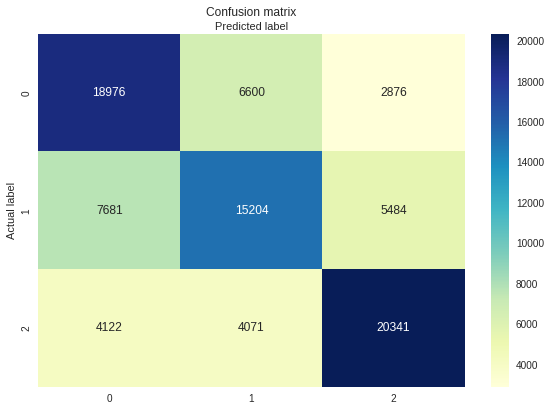

              precision    recall  f1-score   support

    Negative       0.62      0.67      0.64     28452
     Neutral       0.59      0.54      0.56     28369
   Possitive       0.71      0.71      0.71     28534

    accuracy                           0.64     85355
   macro avg       0.64      0.64      0.64     85355
weighted avg       0.64      0.64      0.64     85355



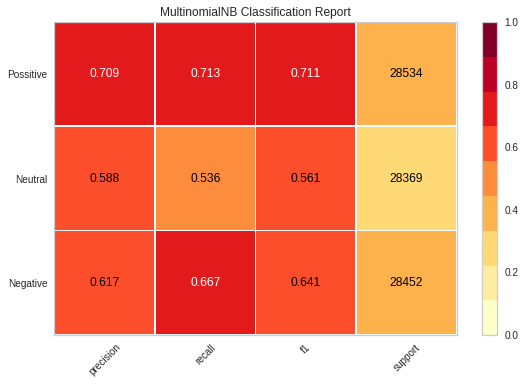

In [13]:
#MultinomialNB
def MNaiveBayes_Count_Vec(X_train,y_train,X_test,y_test):
  global acc1
  clf = MultinomialNB()
  clf.fit(X_train,y_train)
  open('/content/drive/My Drive/Amazon_Product_Sentiment_IE/classifier/mnb_cvec.pkl', 'wb').write(pickle.dumps(clf))
  print("MultinomialNB :train set")
  y_pred = clf.predict(X_train)
  pred=clf.predict_proba(X_test)   
  print("MultinomialNB using Count Vectorizer :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("MultinomialNB using Count Vectorizer :Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("MultinomialNB :Test set")
  y_pred = clf.predict(X_test)
  print("MultinomialNB using Count Vectorizer :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("MultinomialNB using Count Vectorizer :Accuracy : ", accuracy_score(y_test,y_pred)*100)
  acc1 =accuracy_score(y_test,y_pred)*100

  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=['Negative', 'Neutral','Possitive'] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()


  #Classification Report
  target_names = ['Negative', 'Neutral','Possitive']
  prediction=clf.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ['Negative', 'Neutral','Possitive']
  visualizer = ClassificationReport(clf, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()


MNaiveBayes_Count_Vec(X_train_cVec,y_train_cVec,X_test_cVec,y_test_cVec)

MLPClassifier :train set
MLPClassifier using Count Vectorizer :Confusion Matrix:  [[ 90439  18281   5085]
 [ 13770  88128  11990]
 [  2710   7944 103069]]
MLPClassifier using Count Vectorizer :Accuracy :  82.49056869039529
MLPClassifier :Test set
MLPClassifier using Count Vectorizer :Confusion Matrix:  [[19047  7120  2285]
 [ 5771 17568  5030]
 [ 1347  3730 23457]]
MLPClassifier using Count Vectorizer :Accuracy :  70.37900533067776


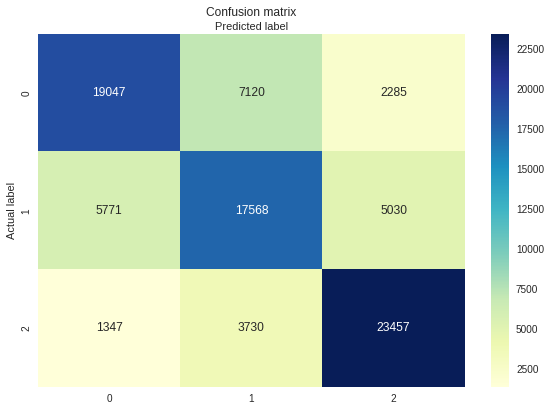

              precision    recall  f1-score   support

    Negative       0.73      0.67      0.70     28452
     Neutral       0.62      0.62      0.62     28369
   Possitive       0.76      0.82      0.79     28534

    accuracy                           0.70     85355
   macro avg       0.70      0.70      0.70     85355
weighted avg       0.70      0.70      0.70     85355



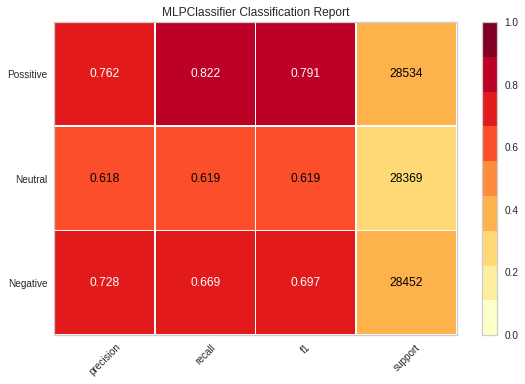

In [15]:
#MLP
from sklearn.neural_network import MLPClassifier
import os
def MLP_Count_Vec(X_train,y_train,X_test,y_test):
  global acc2
  clf = MLPClassifier()
  #clf.fit(X_train,y_train)
  clf = pickle.loads(open(os.path.join('/content/drive/My Drive/Amazon_Product_Sentiment_IE/classifier/mlp_cvec.pkl'),'rb').read())
  #open('/content/drive/My Drive/Amazon_Product_Sentiment_IE/classifier/mlp_cvec.pkl', 'wb').write(pickle.dumps(clf))
  print("MLPClassifier :train set")
  y_pred = clf.predict(X_train)
  pred=clf.predict_proba(X_test)   
  print("MLPClassifier using Count Vectorizer :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("MLPClassifier using Count Vectorizer :Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("MLPClassifier :Test set")
  y_pred = clf.predict(X_test)
  print("MLPClassifier using Count Vectorizer :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("MLPClassifier using Count Vectorizer :Accuracy : ", accuracy_score(y_test,y_pred)*100)
  acc2 =accuracy_score(y_test,y_pred)*100

  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=['Negative', 'Neutral','Possitive'] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()


  #Classification Report
  target_names = ['Negative', 'Neutral','Possitive']
  prediction=clf.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ['Negative', 'Neutral','Possitive']
  visualizer = ClassificationReport(clf, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()


MLP_Count_Vec(X_train_cVec,y_train_cVec,X_test_cVec,y_test_cVec)

SGDClassifier :train set
SGDClassifier using Count Vectorizer :Confusion Matrix:  [[ 95469   9706   8630]
 [ 23389  68780  21719]
 [  5087   4662 103974]]
SGDClassifier using Count Vectorizer :Accuracy :  78.56193031375214
SGDClassifier :Test set
SGDClassifier using Count Vectorizer :Confusion Matrix:  [[20851  4417  3184]
 [ 8377 12901  7091]
 [ 2021  2166 24347]]
SGDClassifier using Count Vectorizer :Accuracy :  68.06748286567864


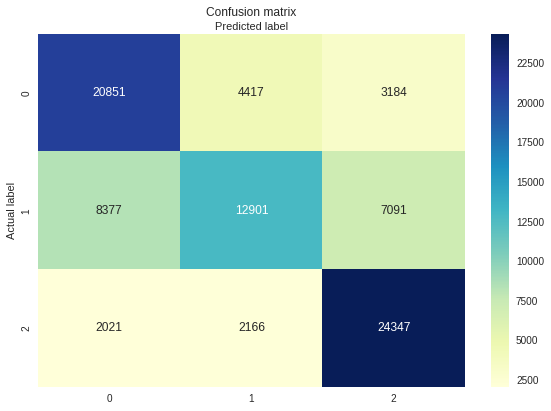

              precision    recall  f1-score   support

    Negative       0.67      0.73      0.70     28452
     Neutral       0.66      0.45      0.54     28369
   Possitive       0.70      0.85      0.77     28534

    accuracy                           0.68     85355
   macro avg       0.68      0.68      0.67     85355
weighted avg       0.68      0.68      0.67     85355



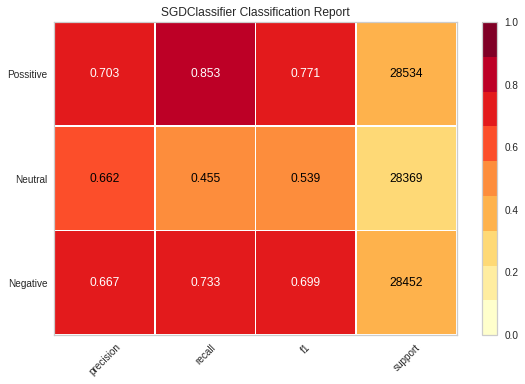

In [16]:
from sklearn.linear_model import SGDClassifier

def SGD_Count_Vec(X_train,y_train,X_test,y_test):
  global acc3
  clf = SGDClassifier(alpha=0.00001)
  clf.fit(X_train,y_train)
  open('/content/drive/My Drive/Amazon_Product_Sentiment_IE/classifier/sgd_cvec.pkl', 'wb').write(pickle.dumps(clf))
  print("SGDClassifier :train set")
  y_pred = clf.predict(X_train)
  #pred=clf.predict_proba(X_test)   
  print("SGDClassifier using Count Vectorizer :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("SGDClassifier using Count Vectorizer :Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("SGDClassifier :Test set")
  y_pred = clf.predict(X_test)
  print("SGDClassifier using Count Vectorizer :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("SGDClassifier using Count Vectorizer :Accuracy : ", accuracy_score(y_test,y_pred)*100)
  acc3 =accuracy_score(y_test,y_pred)*100

  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=['Negative', 'Neutral','Possitive'] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()


  #Classification Report
  target_names = ['Negative', 'Neutral','Possitive']
  prediction=clf.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ['Negative', 'Neutral','Possitive']
  visualizer = ClassificationReport(clf, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()


SGD_Count_Vec(X_train_cVec,y_train_cVec,X_test_cVec,y_test_cVec)

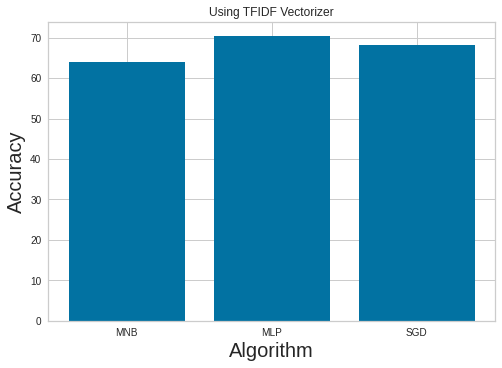

In [23]:
labels = ['MNB','MLP','SGD']
#sizes = [5, neg_per, neu_per]
sizes = [acc1,acc2,acc3]
index = np.arange(len(labels))
plt.bar(index, sizes)
plt.xlabel('Algorithm', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(index, labels, fontsize=10, rotation=0)
plt.title('Using Count Vectorizer')
plt.show()

MultinomialNB :train set
MultinomialNB using TFIDF Vectorizer :Confusion Matrix:  [[78921 25361  9523]
 [26311 69537 18040]
 [11536 15469 86718]]
MultinomialNB using TFIDF Vectorizer :Accuracy :  68.88253626074935
MultinomialNB :Test set
MultinomialNB using TFIDF Vectorizer :Confusion Matrix:  [[18823  7055  2574]
 [ 7231 16239  4899]
 [ 3254  4410 20870]]
MultinomialNB using TFIDF Vectorizer :Accuracy :  65.52867436002578


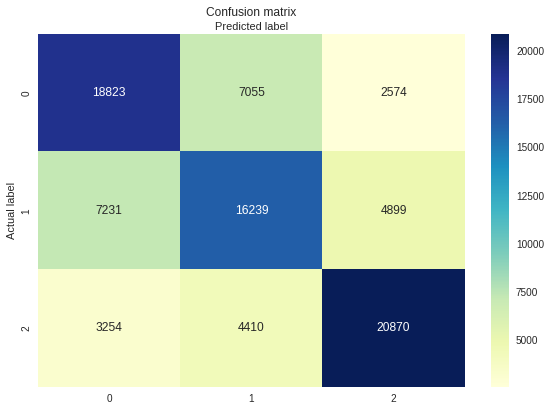

              precision    recall  f1-score   support

    Negative       0.64      0.66      0.65     28452
     Neutral       0.59      0.57      0.58     28369
   Possitive       0.74      0.73      0.73     28534

    accuracy                           0.66     85355
   macro avg       0.65      0.66      0.65     85355
weighted avg       0.66      0.66      0.66     85355



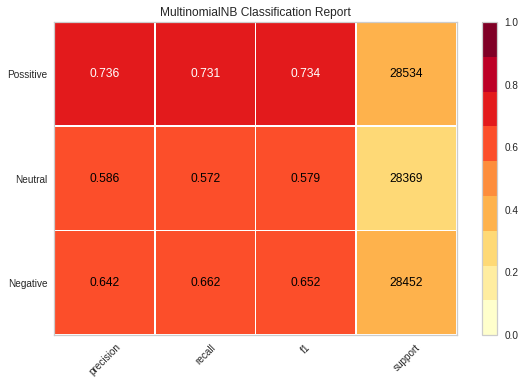

In [18]:
#MultinomialNB
def MNaiveBayes_tfidf_Vec(X_train,y_train,X_test,y_test):
  global acc4
  clf = MultinomialNB()
  clf.fit(X_train,y_train)
  open('/content/drive/My Drive/Amazon_Product_Sentiment_IE/classifier/mnb_tfidfvec.pkl', 'wb').write(pickle.dumps(clf))
  print("MultinomialNB :train set")
  y_pred = clf.predict(X_train)
  pred=clf.predict_proba(X_test)   
  print("MultinomialNB using TFIDF Vectorizer :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("MultinomialNB using TFIDF Vectorizer :Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("MultinomialNB :Test set")
  y_pred = clf.predict(X_test)
  print("MultinomialNB using TFIDF Vectorizer :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("MultinomialNB using TFIDF Vectorizer :Accuracy : ", accuracy_score(y_test,y_pred)*100)
  acc4 =accuracy_score(y_test,y_pred)*100

  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=['Negative', 'Neutral','Possitive'] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()


  #Classification Report
  target_names = ['Negative', 'Neutral','Possitive']
  prediction=clf.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ['Negative', 'Neutral','Possitive']
  visualizer = ClassificationReport(clf, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()


MNaiveBayes_tfidf_Vec(X_train_tVec,y_train_tVec,X_test_tVec,y_test_tVec)

MLPClassifier :train set
MLPClassifier using TFIDF Vectorizer :Confusion Matrix:  [[111961   1582    262]
 [  1330 111799    759]
 [   247    699 112777]]
MLPClassifier using TFIDF Vectorizer :Accuracy :  98.5709515664175
MLPClassifier :Test set
MLPClassifier using TFIDF Vectorizer :Confusion Matrix:  [[18821  7644  1987]
 [ 7419 16565  4385]
 [ 2111  4738 21685]]
MLPClassifier using TFIDF Vectorizer :Accuracy :  66.86310116571964


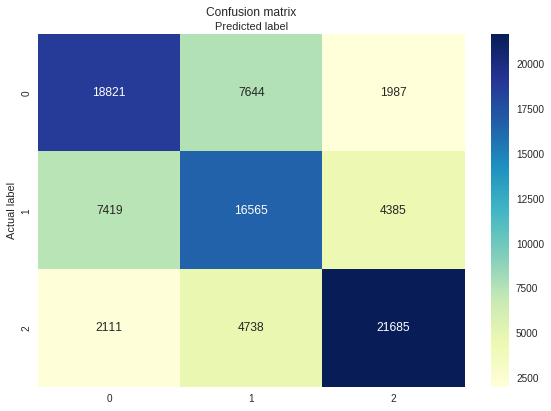

              precision    recall  f1-score   support

    Negative       0.66      0.66      0.66     28452
     Neutral       0.57      0.58      0.58     28369
   Possitive       0.77      0.76      0.77     28534

    accuracy                           0.67     85355
   macro avg       0.67      0.67      0.67     85355
weighted avg       0.67      0.67      0.67     85355



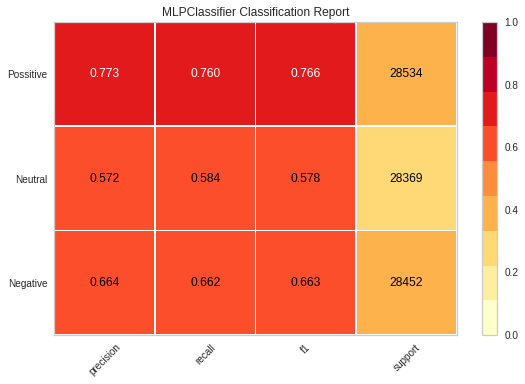

In [22]:
#MLP
from sklearn.neural_network import MLPClassifier
def MLP_tfidf_Vec(X_train,y_train,X_test,y_test):
  global acc5
  clf = MLPClassifier()
  #clf.fit(X_train,y_train)
  #open('/content/drive/My Drive/Amazon_Product_Sentiment_IE/classifier/mlp_tfidfvec.pkl', 'wb').write(pickle.dumps(clf))
  clf = pickle.loads(open(os.path.join('/content/drive/My Drive/Amazon_Product_Sentiment_IE/classifier/mlp_tfidfvec.pkl'),'rb').read())
  print("MLPClassifier :train set")
  y_pred = clf.predict(X_train)
  pred=clf.predict_proba(X_test)   
  print("MLPClassifier using TFIDF Vectorizer :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("MLPClassifier using TFIDF Vectorizer :Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("MLPClassifier :Test set")
  y_pred = clf.predict(X_test)
  print("MLPClassifier using TFIDF Vectorizer :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("MLPClassifier using TFIDF Vectorizer :Accuracy : ", accuracy_score(y_test,y_pred)*100)
  acc5 =accuracy_score(y_test,y_pred)*100

  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=['Negative', 'Neutral','Possitive'] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()


  #Classification Report
  target_names = ['Negative', 'Neutral','Possitive']
  prediction=clf.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ['Negative', 'Neutral','Possitive']
  visualizer = ClassificationReport(clf, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()


MLP_tfidf_Vec(X_train_tVec,y_train_tVec,X_test_tVec,y_test_tVec)

SGDClassifier :train set
SGDClassifier using TFIDF Vectorizer :Confusion Matrix:  [[86462 18088  9255]
 [26407 66457 21024]
 [ 6572  9800 97351]]
SGDClassifier using TFIDF Vectorizer :Accuracy :  73.30353586240832
SGDClassifier :Test set
SGDClassifier using TFIDF Vectorizer :Confusion Matrix:  [[20869  5029  2554]
 [ 7190 15487  5692]
 [ 1878  2891 23765]]
SGDClassifier using TFIDF Vectorizer :Accuracy :  70.43641262960575


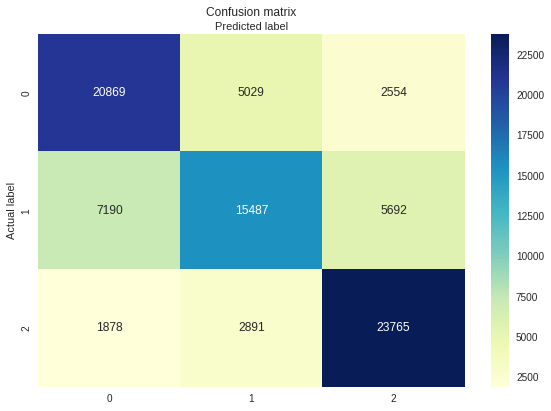

              precision    recall  f1-score   support

    Negative       0.70      0.73      0.71     28452
     Neutral       0.66      0.55      0.60     28369
   Possitive       0.74      0.83      0.79     28534

    accuracy                           0.70     85355
   macro avg       0.70      0.70      0.70     85355
weighted avg       0.70      0.70      0.70     85355



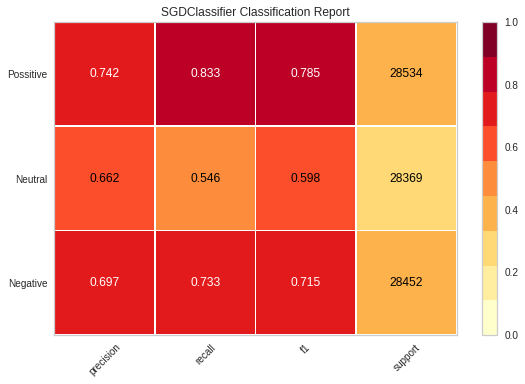

In [20]:
def SGD_tfidf_Vec(X_train,y_train,X_test,y_test):
  global acc6
  clf = SGDClassifier(alpha=0.00001)
  clf.fit(X_train,y_train)
  open('/content/drive/My Drive/Amazon_Product_Sentiment_IE/classifier/sgd_tfidfvec.pkl', 'wb').write(pickle.dumps(clf))
  print("SGDClassifier :train set")
  y_pred = clf.predict(X_train)   
  print("SGDClassifier using TFIDF Vectorizer :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("SGDClassifier using TFIDF Vectorizer :Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("SGDClassifier :Test set")
  y_pred = clf.predict(X_test)
  print("SGDClassifier using TFIDF Vectorizer :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("SGDClassifier using TFIDF Vectorizer :Accuracy : ", accuracy_score(y_test,y_pred)*100)
  acc6 =accuracy_score(y_test,y_pred)*100

  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=['Negative', 'Neutral','Possitive'] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()


  #Classification Report
  target_names = ['Negative', 'Neutral','Possitive']
  prediction=clf.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ['Negative', 'Neutral','Possitive']
  visualizer = ClassificationReport(clf, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()

SGD_tfidf_Vec(X_train_tVec,y_train_tVec,X_test_tVec,y_test_tVec)

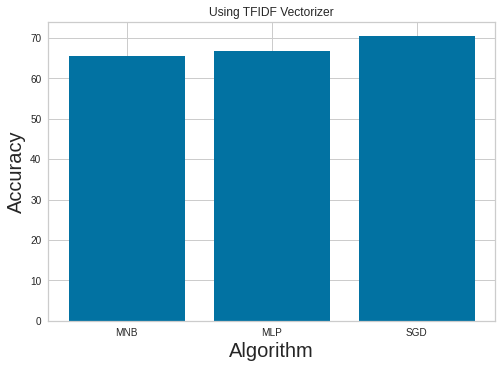

In [21]:
labels = ['MNB','MLP','SGD']
#sizes = [5, neg_per, neu_per]
sizes = [acc4,acc5,acc6]
index = np.arange(len(labels))
plt.bar(index, sizes)
plt.xlabel('Algorithm', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(index, labels, fontsize=10, rotation=0)
plt.title('Using TFIDF Vectorizer')
plt.show()